In [ ]:
# ===============================
# RideWise: Bike-Sharing Demand Prediction
# Author: Jyoshika Irlapati
# ===============================

# --- Standard Libraries ---
import math
import json
import warnings
from datetime import datetime

# --- Data Handling ---
import pandas as pd
import numpy as np

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Machine Learning ---
from sklearn.model_selection import train_test_split, TimeSeriesSplit, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
# --- Utilities ---
import joblib

# --- Configurations ---
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-muted")
sns.set_context("talk")  # Better readability for plots


In [ ]:
# 1. Model Selection & Validation

# train_test_split: Splits dataset into training and testing sets.

# TimeSeriesSplit: Special cross-validation for time series data (preserves order).

# RandomizedSearchCV: Hyperparameter tuning with random combinations (faster for large parameter grids).

# GridSearchCV: Hyperparameter tuning with all possible combinations.

# 2. Preprocessing

# StandardScaler: Scales numeric features to zero mean, unit variance.

# OneHotEncoder: Converts categorical features into binary columns.

# ColumnTransformer: Applies different transformations to different columns.

# Pipeline: Chains preprocessing + model steps into a single workflow.

# SimpleImputer: Handles missing values (e.g., fill with mean, median, or mode).

# 3. Models

# LinearRegression: Standard linear model for regression.

# RandomForestRegressor: Ensemble model using multiple decision trees, reduces overfitting.

# GradientBoostingRegressor: Ensemble of trees built sequentially to correct errors.

# XGBRegressor: Extreme Gradient Boosting — fast and often very accurate.

# 4. Metrics

# mean_squared_error (MSE): Measures average squared difference between predicted and actual values.

# mean_absolute_error (MAE): Measures average absolute difference.

# r2_score: Measures proportion of variance explained by the model (1 = perfect, 0 = no fit).

In [ ]:
# ===============================
# Load and Explore the Data
# ===============================

# --- Load datasets ---
try:
    day = pd.read_csv("day.csv")
    hour = pd.read_csv("hour.csv")
except FileNotFoundError as e:
    print(f"Error: {e}")
    raise

# --- Dataset shapes ---
print(f"✅ Day dataset shape: {day.shape}")
print(f"✅ Hour dataset shape: {hour.shape}\n")

# --- Quick glimpse of the data ---
print("Day dataset preview:")
display(day.head())

print("Hour dataset preview:")
display(hour.head())

# --- Basic info and missing values ---
print("\nDay dataset info:")
day.info()
print("\nMissing values in Day dataset:")
print(day.isnull().sum())

print("\nHour dataset info:")
hour.info()
print("\nMissing values in Hour dataset:")
print(hour.isnull().sum())

# --- Descriptive statistics ---
print("\nDay dataset statistics:")
display(day.describe())

print("\nHour dataset statistics:")
display(hour.describe())


✅ Day dataset shape: (731, 16)
✅ Hour dataset shape: (17379, 17)

Day dataset preview:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Hour dataset preview:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



Day dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Missing values in Day dataset:
instant       0
dteday        0
season    

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



Hour dataset statistics:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# Load datasets safely with error handling.

# Check dataset shape to ensure proper loading.

# Preview first rows to understand columns and data.

# Inspect info & missing values for data quality checks.

# Compute descriptive statistics to understand numeric distributions.

Skewness: -0.05
Kurtosis: -0.81


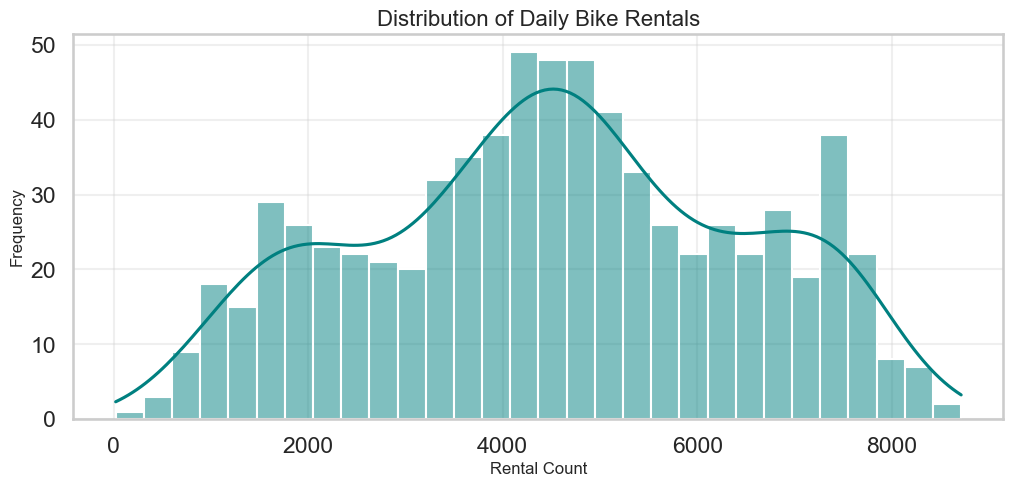

In [ ]:
# ===============================
# Visualize Bike Rental Demand
# ===============================

plt.figure(figsize=(12, 5))
sns.histplot(day['cnt'], kde=True, color='teal', bins=30)
plt.title("Distribution of Daily Bike Rentals", fontsize=16)
plt.xlabel("Rental Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(alpha=0.3)

# --- Additional Insights ---
skewness = day['cnt'].skew()
kurtosis = day['cnt'].kurt()
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")

plt.show()


In [ ]:
# The histogram shows how often different rental counts occur.

# The KDE curve shows the smoothed shape of the distribution.

# Helps identify:

# Most common daily demand (mode)

# Spread of demand (variance)

# Outliers (extremely high or low rentals)

# Skewness (is the data left/right skewed?)

📌 EDA for Day Dataset
Data Shape: (731, 16)


,Column,Dtype,Missing,% Missing,Unique,Top,Top Freq
0,instant,int64,0,0.0,731,1,1
1,dteday,object,0,0.0,731,2011-01-01,1
2,season,int64,0,0.0,4,3,188
3,yr,int64,0,0.0,2,1,366
4,mnth,int64,0,0.0,12,1,62
5,holiday,int64,0,0.0,2,0,710
6,weekday,int64,0,0.0,7,0,105
7,workingday,int64,0,0.0,2,1,500
8,weathersit,int64,0,0.0,3,1,463
9,temp,float64,0,0.0,499,0.265833,5



Numeric columns: ['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Categorical columns: ['dteday']


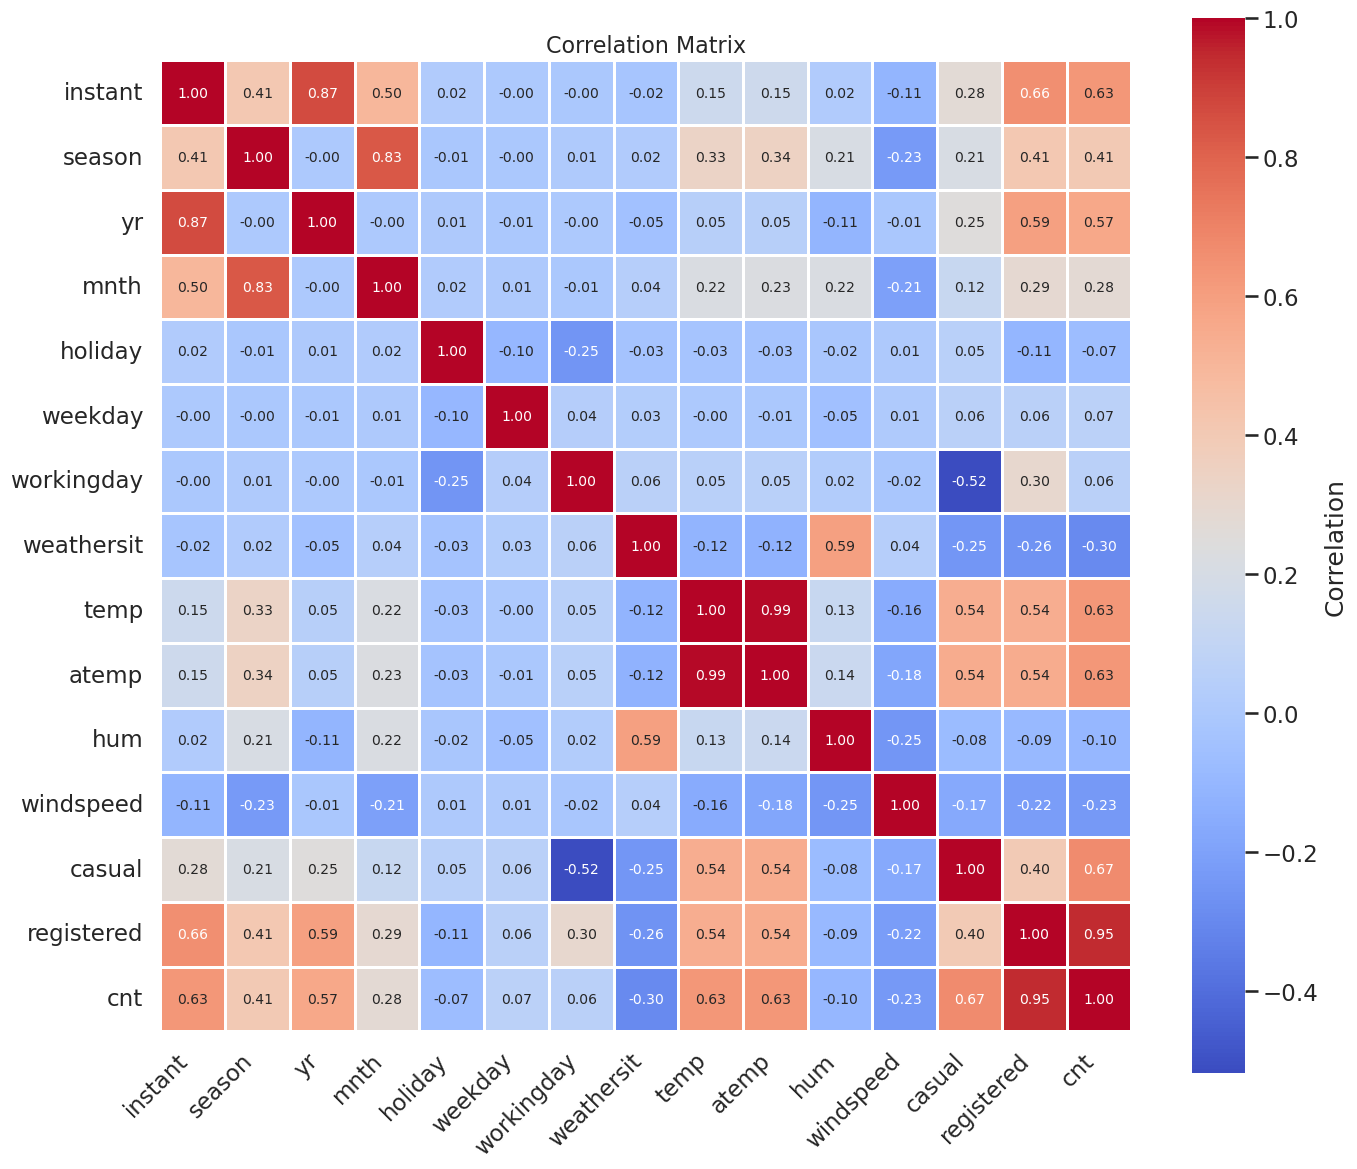

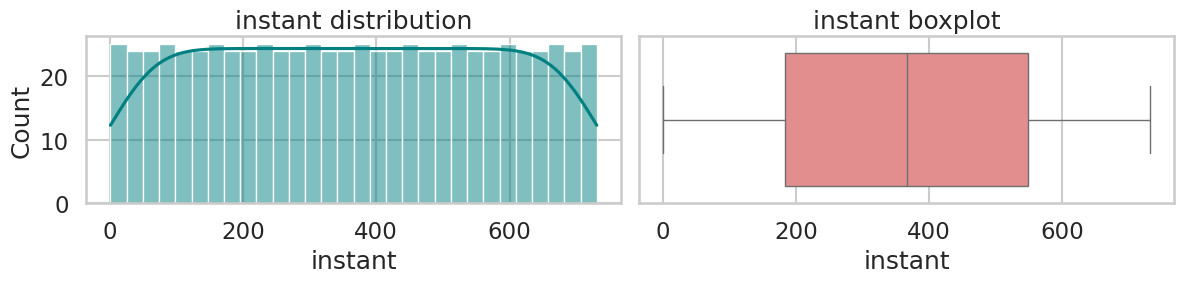

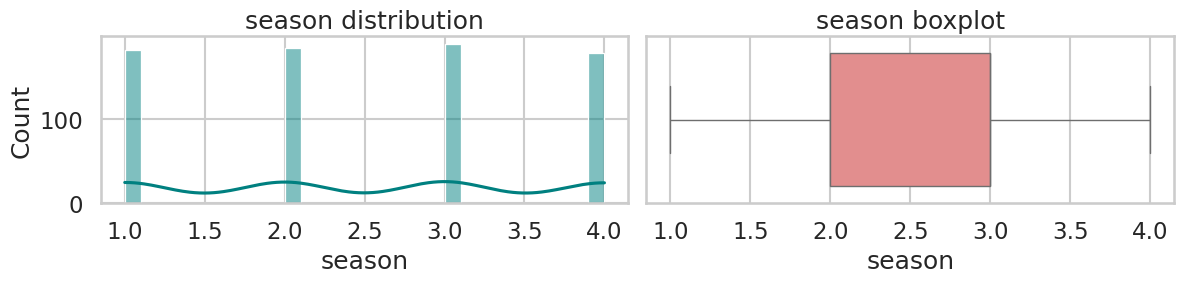

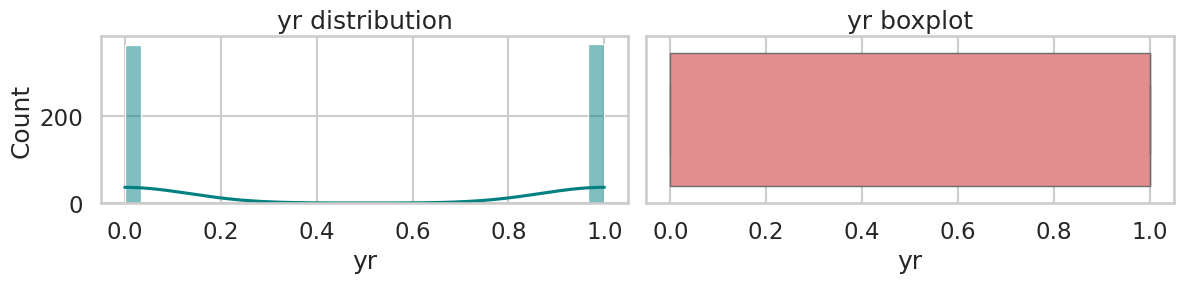

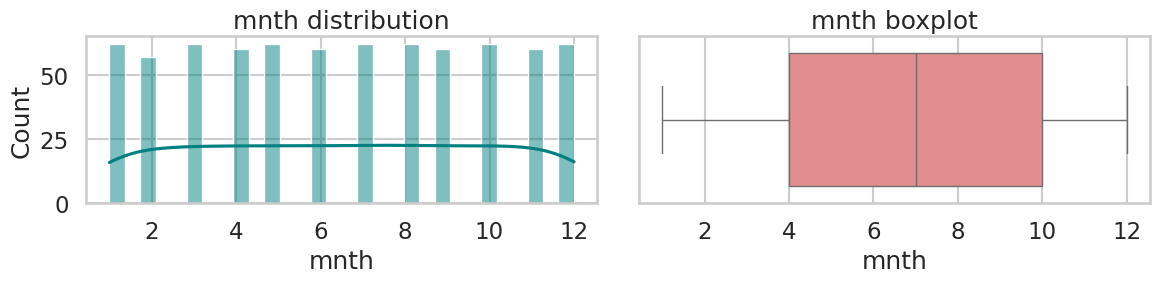

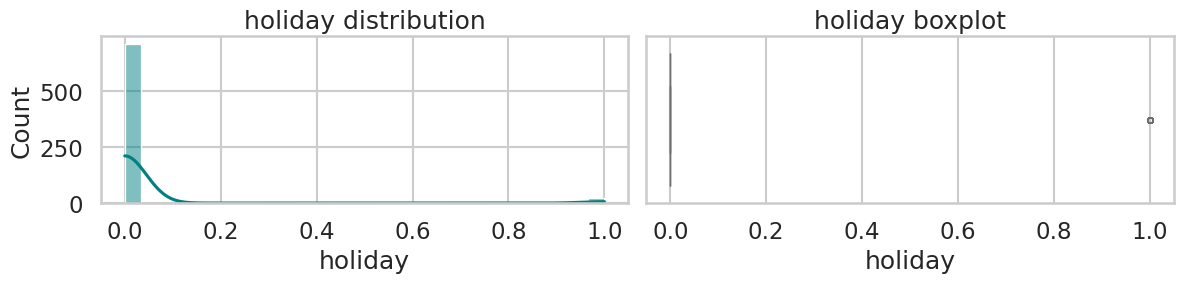

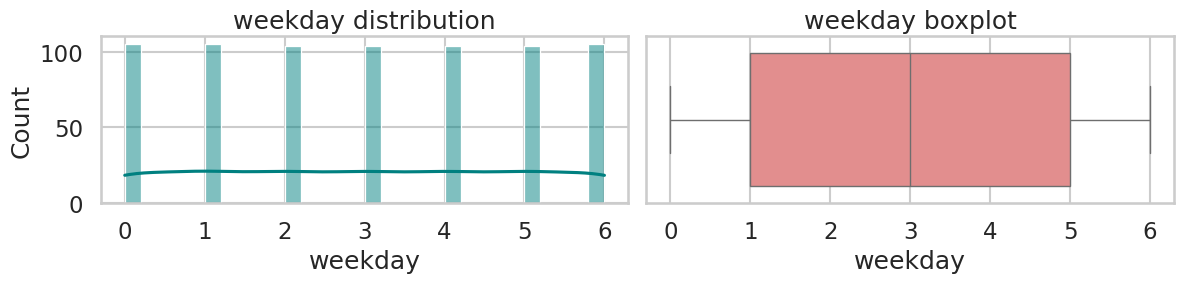

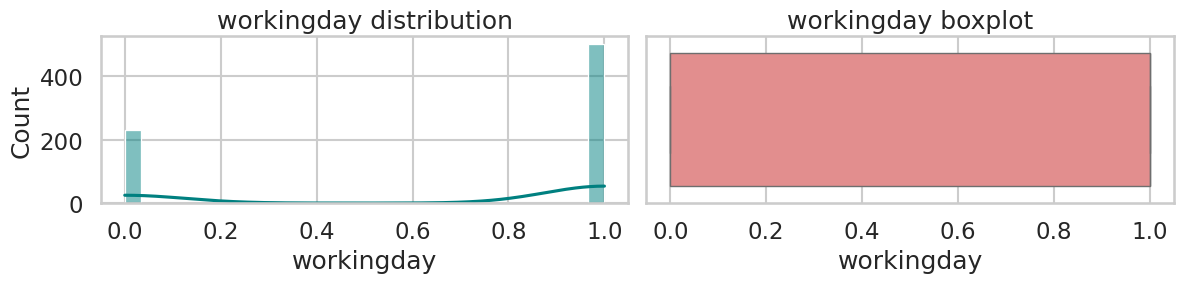

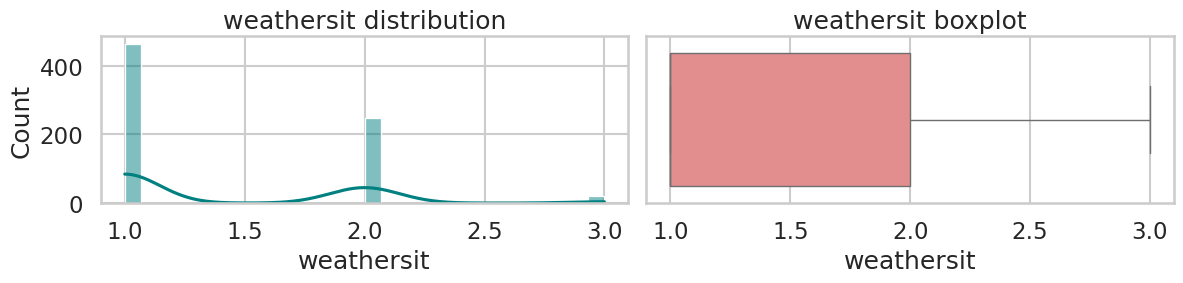

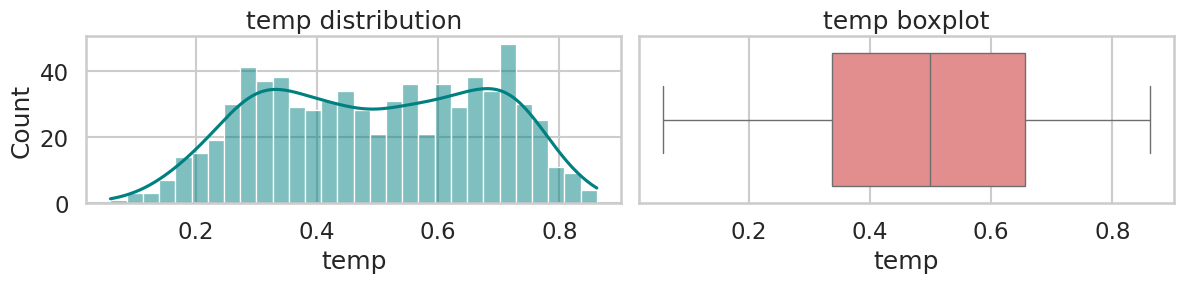

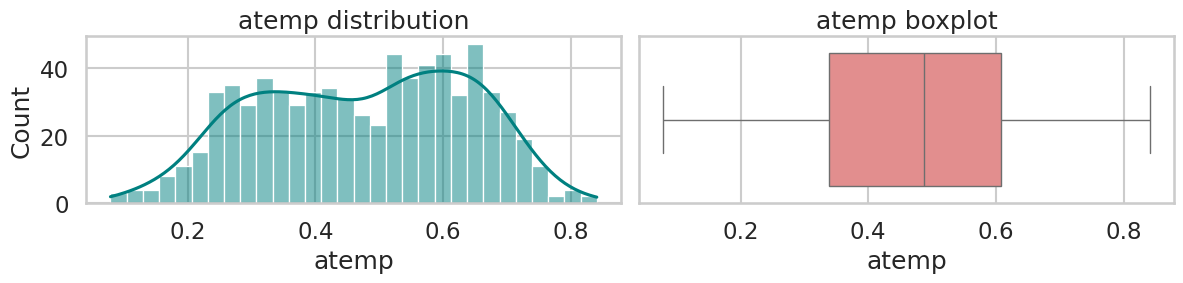

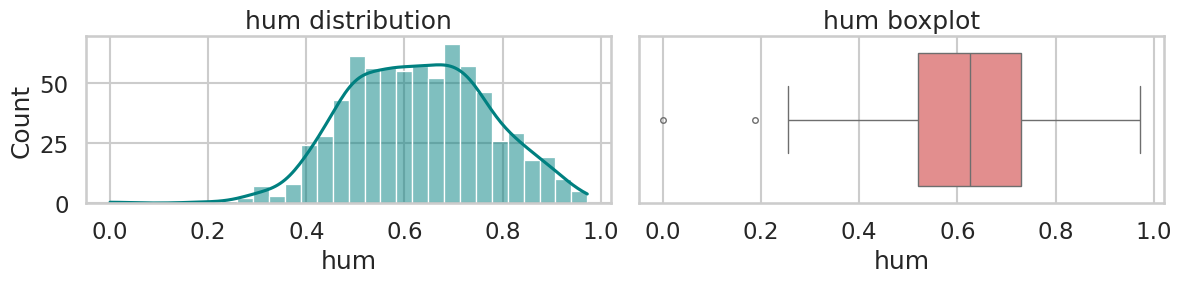

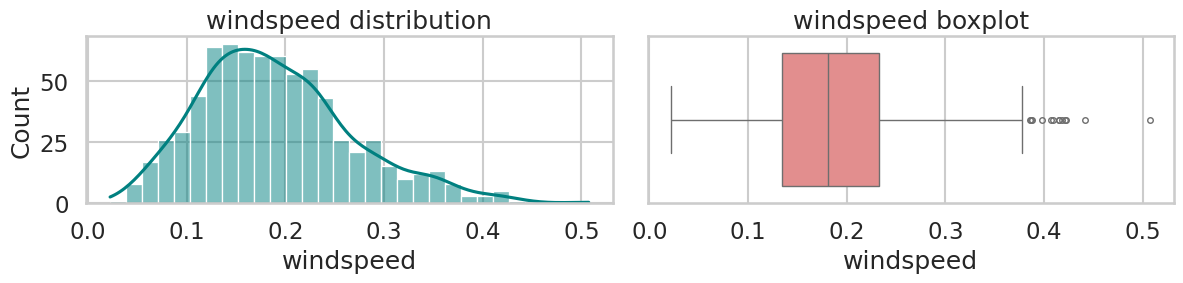

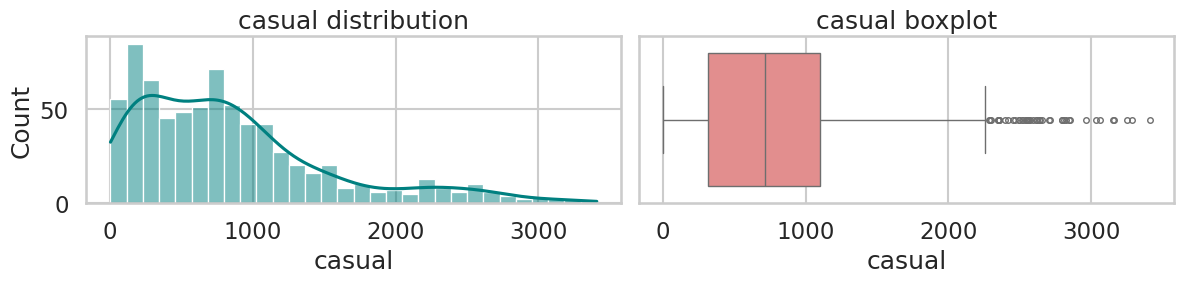

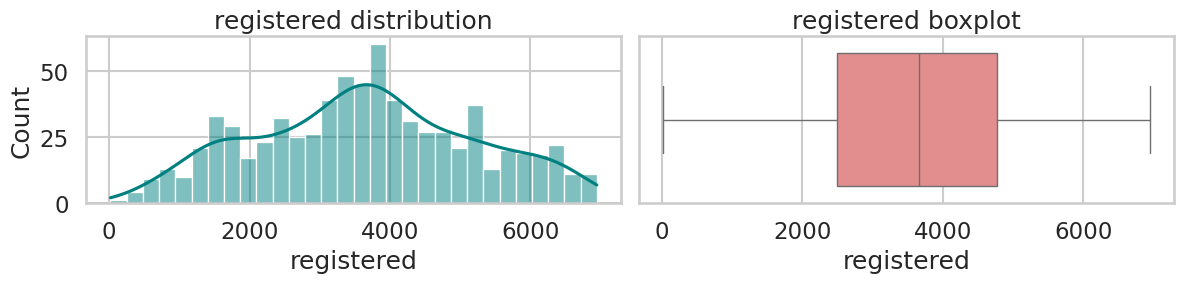

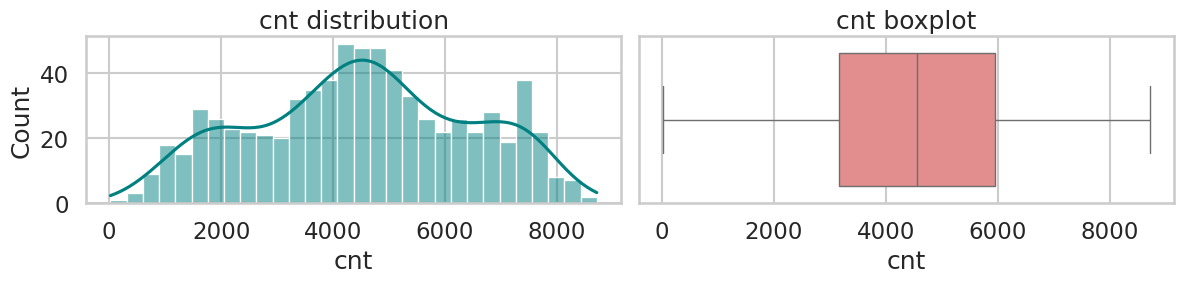


📌 EDA for Hour Dataset
Data Shape: (17379, 17)


,Column,Dtype,Missing,% Missing,Unique,Top,Top Freq
0,instant,int64,0,0.0,17379,1,1
1,dteday,object,0,0.0,731,2011-01-01,24
2,season,int64,0,0.0,4,3,4496
3,yr,int64,0,0.0,2,1,8734
4,mnth,int64,0,0.0,12,5,1488
5,hr,int64,0,0.0,24,16,730
6,holiday,int64,0,0.0,2,0,16879
7,weekday,int64,0,0.0,7,6,2512
8,workingday,int64,0,0.0,2,1,11865
9,weathersit,int64,0,0.0,4,1,11413



Numeric columns: ['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
Categorical columns: ['dteday']


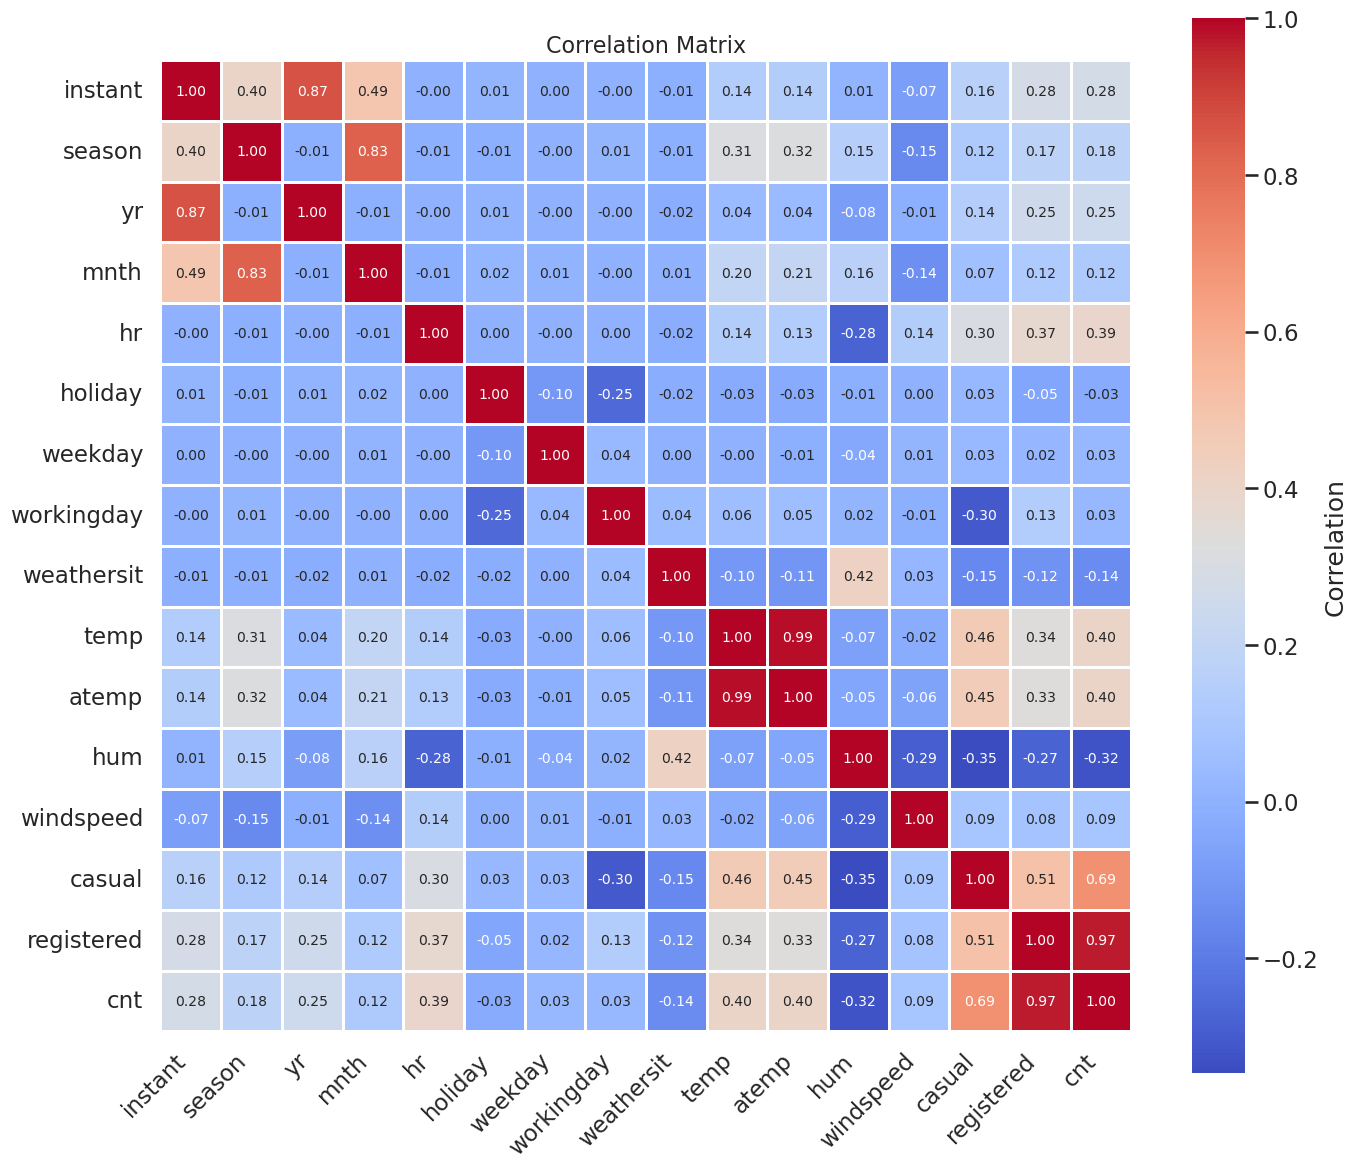

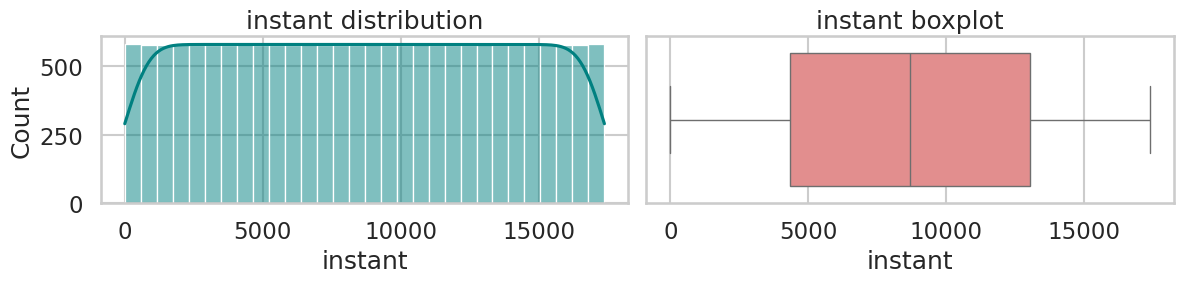

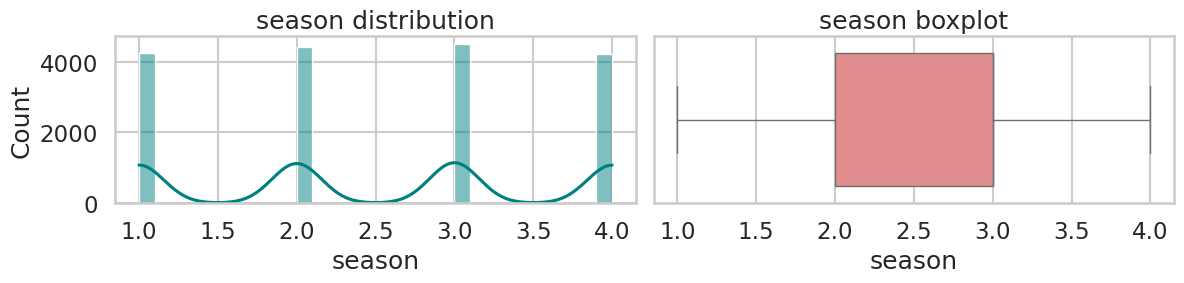

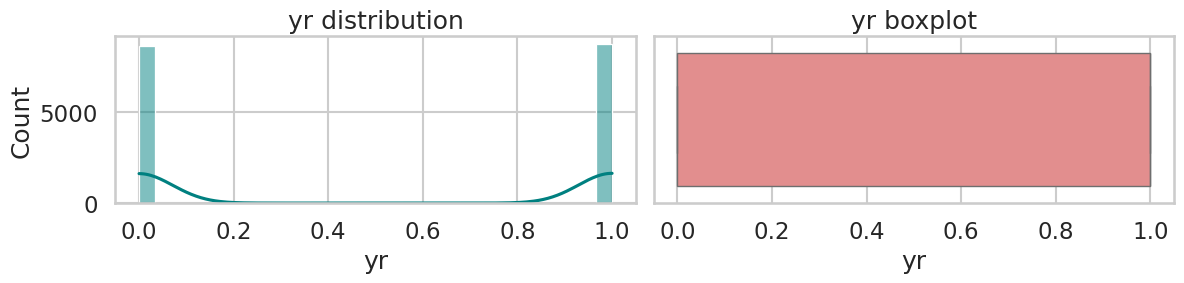

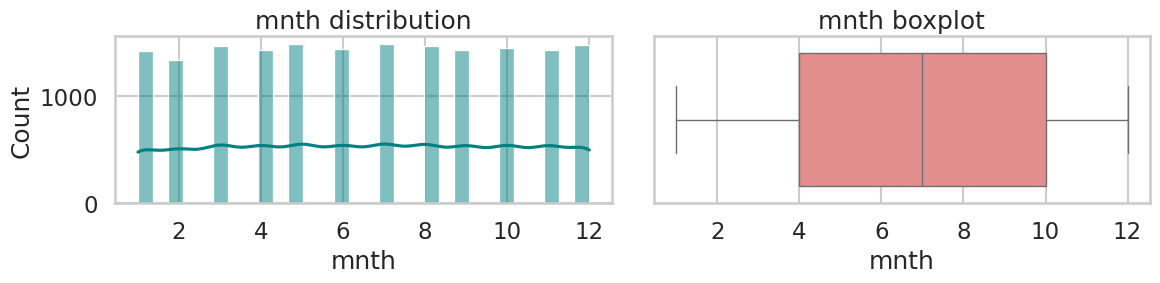

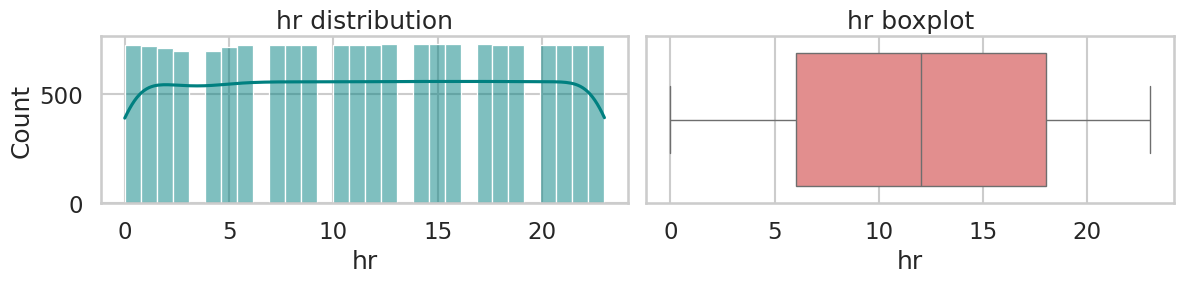

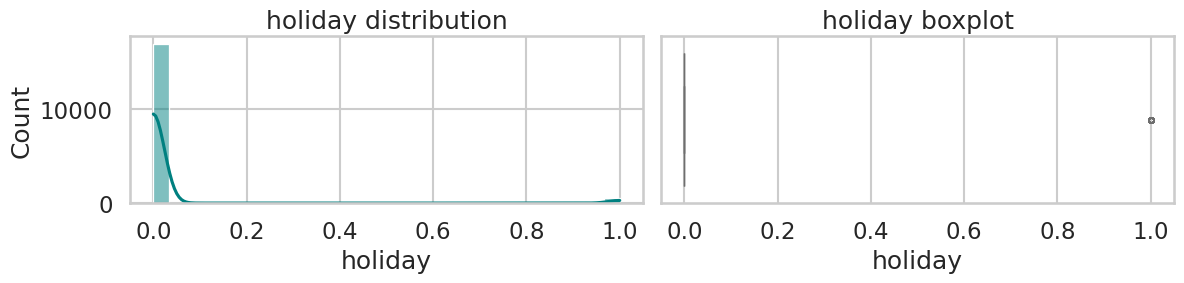

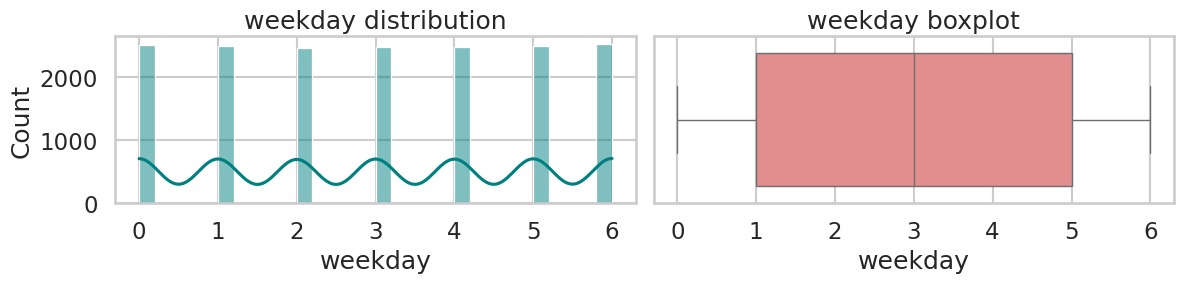

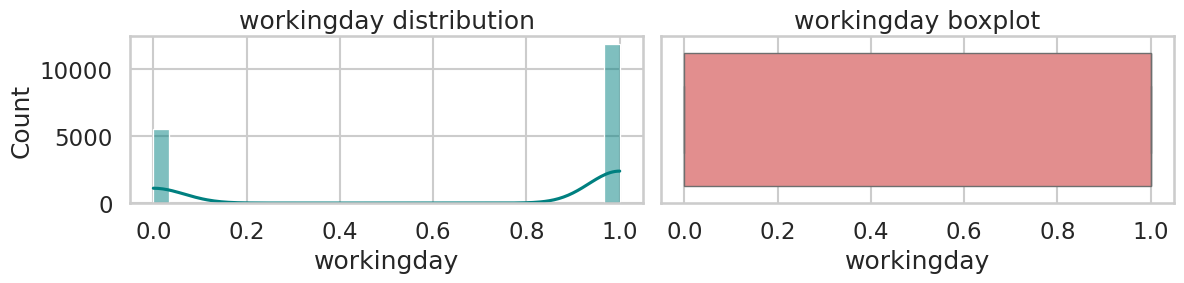

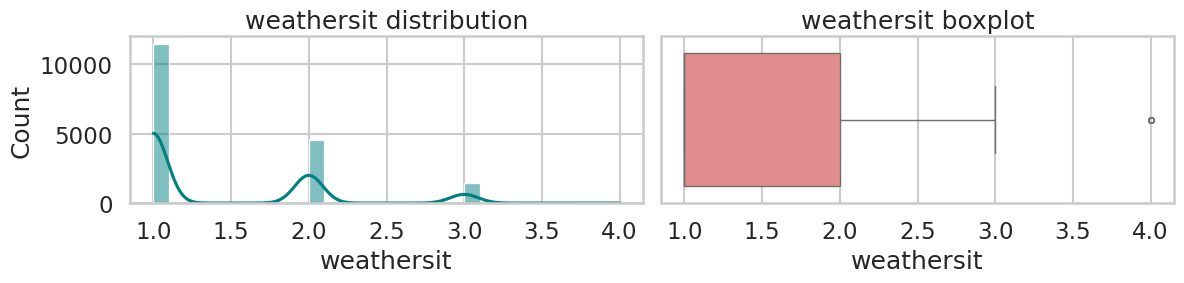

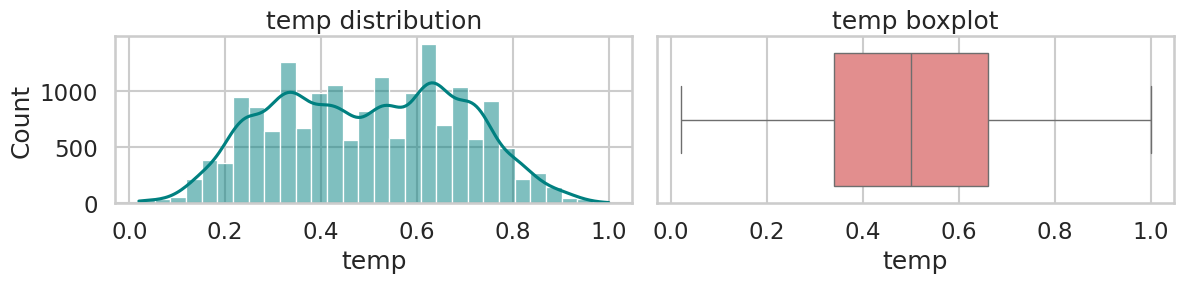

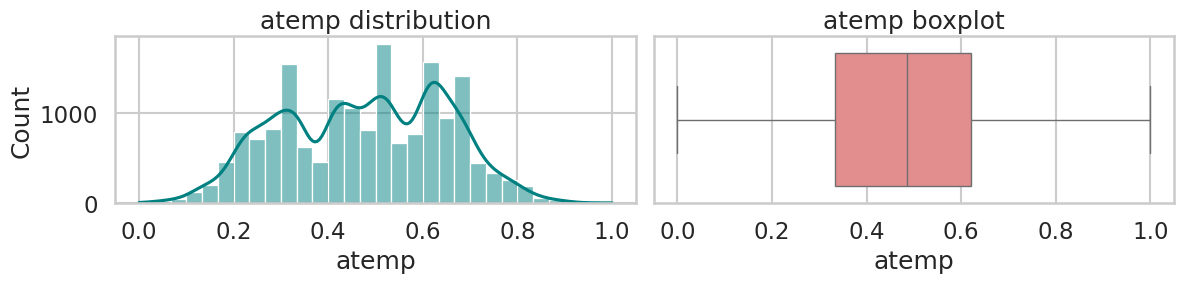

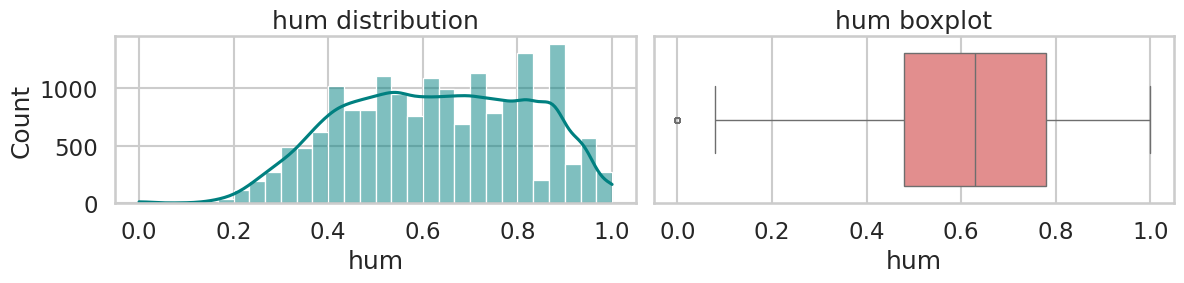

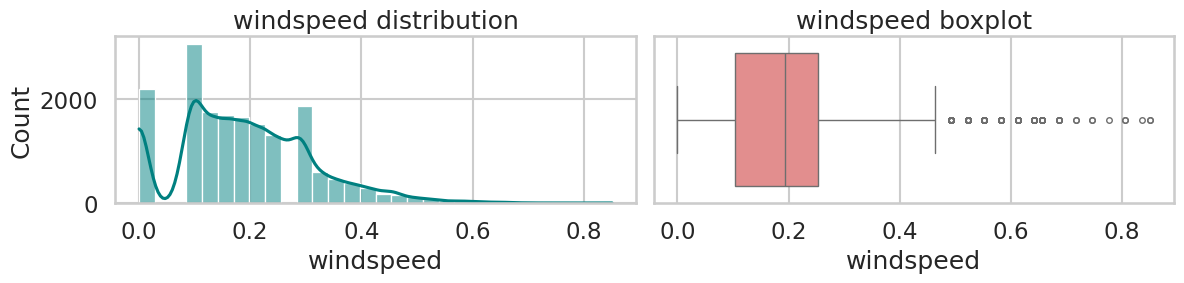

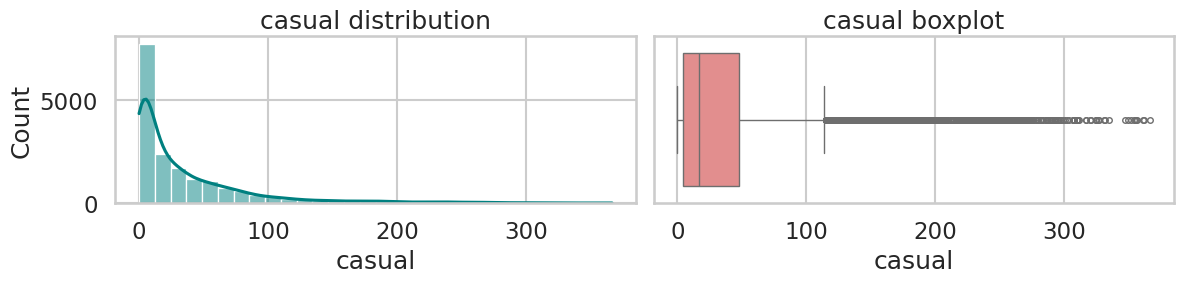

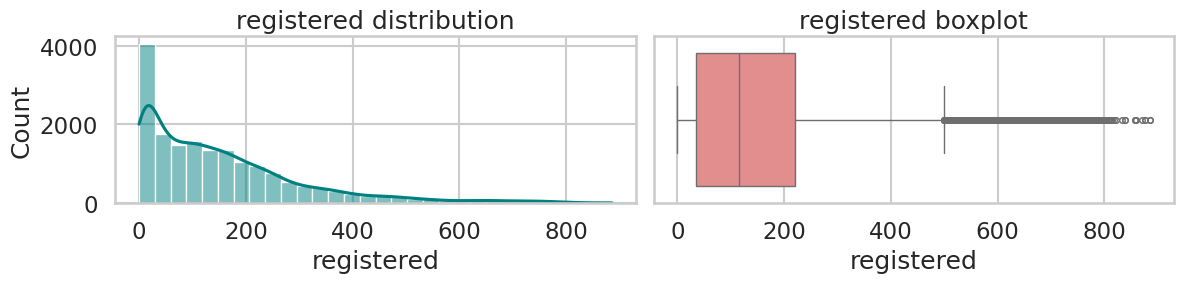

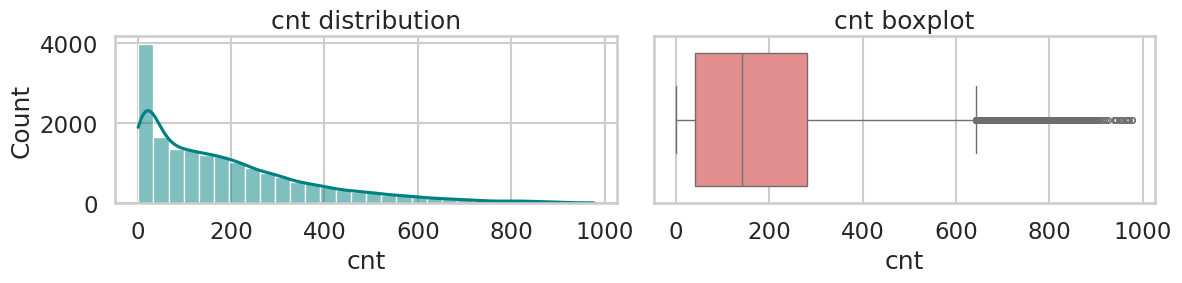

In [ ]:
# ===============================
# EDA FUNCTION (Updated Correlation Matrix, Warning-Free)
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12, 'font.family': 'DejaVu Sans'})  # Emoji-safe font

def eda_report(df, max_unique_for_bars=25, figsize=(14, 10), show_plots=True):
    """
    Prints a concise EDA report and optionally plots insights for a pandas DataFrame.

    Parameters:
        df (pd.DataFrame): Input dataframe
        max_unique_for_bars (int): Max unique values to plot bar plots for categorical cols
        figsize (tuple): Figure size for plots
        show_plots (bool): Whether to display plots

    Returns:
        summary_df (pd.DataFrame): Summary table with missing values, top values, etc.
    """
    assert isinstance(df, pd.DataFrame), "df must be a pandas DataFrame"

    # --- Summary info ---
    summary = []
    for col in df.columns:
        series = df[col]
        dtype = series.dtype
        n_missing = series.isna().sum()
        pct_missing = 100 * n_missing / len(df)
        n_unique = series.nunique(dropna=True)
        top = series.mode().iloc[0] if n_unique > 0 else np.nan
        freq = int(series.value_counts(dropna=True).iloc[0]) if n_unique > 0 else 0
        summary.append([col, dtype, n_missing, round(pct_missing, 2), n_unique, top, freq])
        #Loops over every column and collects key information:

# dtype → data type (int, float, object)

# n_missing → number of missing values

# pct_missing → % of missing values

# n_unique → number of unique values

# top → most frequent value

# freq → frequency of top value

# summary is a list of lists which will be converted to a DataFrame next.

    summary_df = pd.DataFrame(summary, columns=['Column','Dtype','Missing','% Missing','Unique','Top','Top Freq'])
    print(f"Data Shape: {df.shape}")
    display(summary_df)
# Converts the list into a DataFrame for easy viewing.

# Shows data shape and summary of all columns.
    # --- Column types ---
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
    print('\nNumeric columns:', numeric_cols)
    print('Categorical columns:', cat_cols)
#  Separates numeric vs categorical columns.

# Useful for different preprocessing or plotting strategies.


    if show_plots:
        # --- Missing Values Plot ---
        miss_pct = summary_df.set_index('Column')['% Missing'].sort_values(ascending=False)
        if miss_pct.sum() > 0:  # only plot if there are missing values
            plt.figure(figsize=(min(figsize[0], 18), 4))
            sns.barplot(
                x=miss_pct.index, 
                y=miss_pct.values, 
                hue=miss_pct.index,  # fixes FutureWarning
                palette='coolwarm', 
                dodge=False,
                legend=False
            )
            plt.ylabel('% Missing')
            plt.title('Missing Values by Column')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
# Plots missing values for each column using a bar chart.

# Only plots if there are any missing values (miss_pct.sum() > 0).

# hue=miss_pct.index → avoids Seaborn FutureWarning for duplicate bars.
# Why:
# Visually identifies problematic columns that may need imputation.

        # --- Correlation Heatmap ---
        if len(numeric_cols) >= 2:
            corr = df[numeric_cols].corr()
            plt.figure(figsize=(14, 12))
            sns.heatmap(
                corr,
                annot=True,
                fmt=".2f",
                cmap="coolwarm",
                cbar_kws={'label': 'Correlation'},
                linewidths=0.8,
                square=True,
                annot_kws={"size":10}
            )
            plt.title('Correlation Matrix', fontsize=16)
            plt.xticks(rotation=45, ha='right')
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
# Computes pairwise correlations for numeric columns.

# Plots a heatmap showing how strongly variables are correlated.

# annot=True → shows correlation values inside cells.

# Why: Helps detect multicollinearity, useful for feature selection.

        # --- Column-wise Plots ---
        for col in df.columns:
            if col in numeric_cols:
                fig, ax = plt.subplots(1, 2, figsize=(12, 3))
                sns.histplot(df[col], bins=30, kde=True, ax=ax[0], color='teal', edgecolor=None)
                ax[0].set_title(f'{col} distribution')
                sns.boxplot(x=df[col], ax=ax[1], color='lightcoral', fliersize=4)
                ax[1].set_title(f'{col} boxplot')
                plt.tight_layout()
                plt.show()
            else:
                n_unique = df[col].nunique(dropna=True)
                if n_unique <= max_unique_for_bars:
                    plt.figure(figsize=(8, 3))
                    sns.countplot(
                        x=col, 
                        data=df, 
                        order=df[col].value_counts().index, 
                        color='skyblue',  # avoids palette FutureWarning
                        edgecolor=None
                    )
                    plt.title(f'Value Counts for {col}')
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    plt.show()

    return summary_df
# Plots histogram + KDE → shows distribution of values.

# Plots boxplot → shows outliers and spread.

# Why: Helps decide scaling, transformation, or outlier handling.
# Plots value counts for categorical columns.

# Only for columns with n_unique <= max_unique_for_bars.

# Why: Shows frequency of categories — helpful for encoding or detecting rare categories.
# Returns summary DataFrame containing missing values, top values, unique counts, etc.

# Can be used programmatically later in preprocessing

# ===============================
# Run EDA for day and hour datasets
# ===============================
day = pd.read_csv("day.csv")
hour = pd.read_csv("hour.csv")

print("📌 EDA for Day Dataset")
eda_summary_day = eda_report(day)

print("\n📌 EDA for Hour Dataset")
eda_summary_hour = eda_report(hour)
# This provides a comprehensive automated EDA: missing data, column types, distributions, correlations, and categorical counts — all in one function.

# Saves time and avoids repetitive code.

In [ ]:
# ===============================
# RideWise: Feature Engineering & Preprocessing
# ===============================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ===============================
# Load Dataset
# ===============================
df = pd.read_csv("hour.csv")  # Adjust path if needed
print(f"✅ Data Loaded: {df.shape}")
display(df.head(3))

# ===============================
# Feature Engineering Function
# ===============================
def feature_engineering(df):
    df = df.copy()
    df['dteday'] = pd.to_datetime(df['dteday'])

    # --- Date features ---
    df['year'] = df['dteday'].dt.year
    df['month'] = df['dteday'].dt.month
    df['day'] = df['dteday'].dt.day
    df['dayofweek'] = df['dteday'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

    # --- Cyclical Encoding ---
    df['hour_sin'] = np.sin(2 * np.pi * df['hr'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hr'] / 24)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    # --- Interaction Features ---
    df['temp_hum_interaction'] = df['temp'] * df['hum']
    df['windspeed_temp_interaction'] = df['windspeed'] * df['temp']

    # --- Drop redundant columns ---
    df.drop(columns=['instant', 'dteday', 'atemp', 'casual', 'registered'], inplace=True, errors='ignore')
    return df

# Apply Feature Engineering
df = feature_engineering(df)
print("✅ Feature Engineering Completed")
display(df.head(3))

# ===============================
# Split Features & Target
# ===============================
target_col = 'cnt'
X = df.drop(columns=[target_col])
y = df[target_col]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✅ Train/Test Split Done | Train: {X_train.shape}, Test: {X_test.shape}")

# ===============================
# Preprocessing Pipelines
# ===============================
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_cols),
    ('cat', cat_pipeline, categorical_cols)
])

print("✅ Preprocessing Pipeline Ready")
print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")


✅ Data Loaded: (17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


✅ Feature Engineering Completed


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,...,dayofweek,is_weekend,hour_sin,hour_cos,dayofweek_sin,dayofweek_cos,month_sin,month_cos,temp_hum_interaction,windspeed_temp_interaction
0,1,0,1,0,0,6,0,1,0.24,0.81,...,5,1,0.000000,1.000000,-0.974928,-0.222521,0.5,0.866025,0.1944,0.0
1,1,0,1,1,0,6,0,1,0.22,0.80,...,5,1,0.258819,0.965926,-0.974928,-0.222521,0.5,0.866025,0.1760,0.0
2,1,0,1,2,0,6,0,1,0.22,0.80,...,5,1,0.500000,0.866025,-0.974928,-0.222521,0.5,0.866025,0.1760,0.0


✅ Train/Test Split Done | Train: (13903, 24), Test: (3476, 24)
✅ Preprocessing Pipeline Ready
Numeric columns: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'hour_sin', 'hour_cos', 'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos', 'temp_hum_interaction', 'windspeed_temp_interaction']
Categorical columns: []



🚀 Training Random Forest ...
✅ Random Forest Results:
   R²: 0.9456
   RMSE: 41.52
   5-Fold CV R²: 0.9435

🚀 Training Gradient Boosting ...
✅ Gradient Boosting Results:
   R²: 0.9569
   RMSE: 36.94
   5-Fold CV R²: 0.9543

🚀 Training XGBoost ...
✅ XGBoost Results:
   R²: 0.9600
   RMSE: 35.60
   5-Fold CV R²: 0.9583

🏁 Final Model Comparison:


,R²,RMSE,CV R²
Random Forest,0.945560,41.519297,0.943486
Gradient Boosting,0.956897,36.944243,0.954250
XGBoost,0.959966,35.604639,0.958310


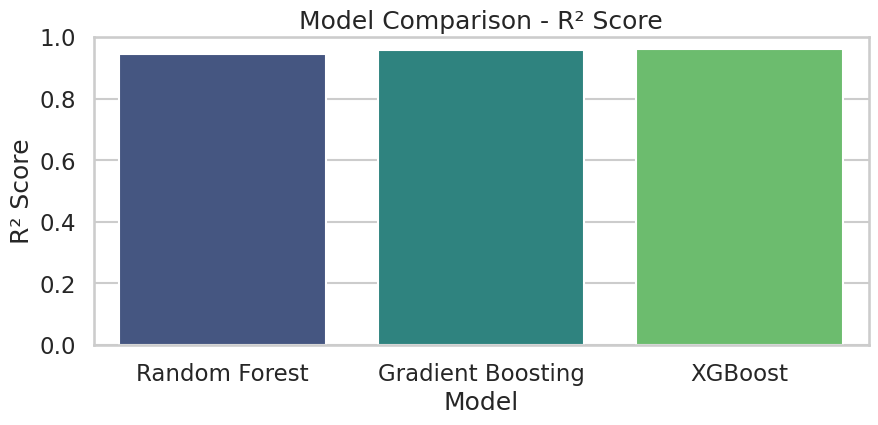

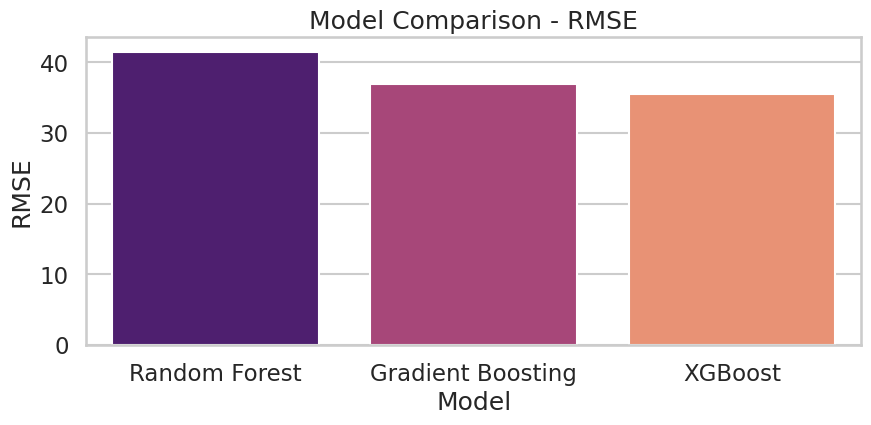

In [ ]:
# ===============================
# RideWise: Model Training, Validation & Accuracy
# ===============================

# --- Imports ---
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ===============================
# Define Models
# ===============================
models = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300, max_depth=20, min_samples_split=4,
        min_samples_leaf=2, random_state=42, n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=400, learning_rate=0.05,
        max_depth=6, subsample=0.9, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=800, learning_rate=0.05,
        max_depth=7, subsample=0.9, colsample_bytree=0.9,
        random_state=42, n_jobs=-1
    )
}

# ===============================
# Function: Train, Validate, Evaluate
# ===============================
def train_validate(models, X_train, X_test, y_train, y_test, preprocessor):
    results = {}
    for name, model in models.items():
        print(f"\n🚀 Training {name} ...")
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('model', model)
        ])

        # Train
        pipe.fit(X_train, y_train)

        # Predictions
        y_pred = pipe.predict(X_test)

        # --- Metrics ---
        r2 = r2_score(y_test, y_pred)
        # Compatible with all sklearn versions
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        cv_score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()

        # Store results
        results[name] = {'R²': r2, 'RMSE': rmse, 'CV R²': cv_score}

        # Print results
        print(f"✅ {name} Results:")
        print(f"   R²: {r2:.4f}")
        print(f"   RMSE: {rmse:.2f}")
        print(f"   5-Fold CV R²: {cv_score:.4f}")

    # Return as DataFrame
    return pd.DataFrame(results).T

# ===============================
# Run Training & Compare
# ===============================
summary_df = train_validate(models, X_train, X_test, y_train, y_test, preprocessor)
print("\n🏁 Final Model Comparison:")
display(summary_df)

# ===============================
# ===============================
# Visualization
# ===============================

plt.figure(figsize=(10, 4))
sns.barplot(x=summary_df.index, y=summary_df['R²'], hue=summary_df.index, palette="viridis", legend=False)
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.xlabel("Model")
plt.show()

plt.figure(figsize=(10, 4))
sns.barplot(x=summary_df.index, y=summary_df['RMSE'], hue=summary_df.index, palette="magma", legend=False)
plt.title("Model Comparison - RMSE")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.show()



In [ ]:
!pip install xgboost


🏆 Selected Model for Visualization: XGBoost

📊 Performance Metrics (XGBoost):
   R² Score : 0.9600
   RMSE     : 35.60
   MAE      : 21.35


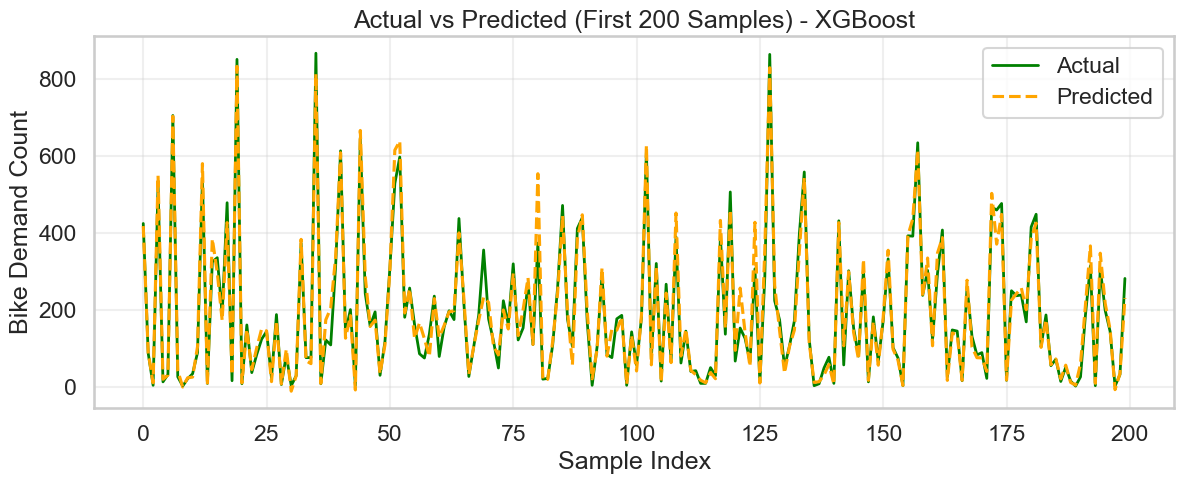

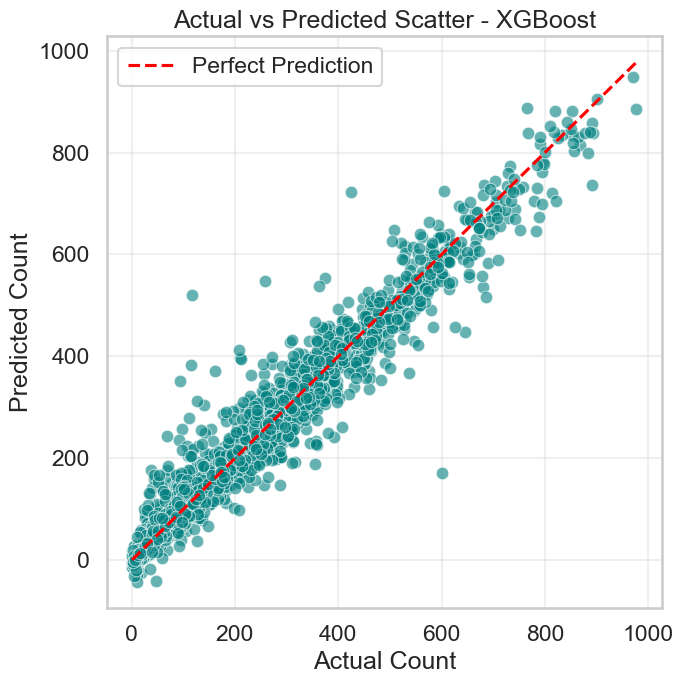

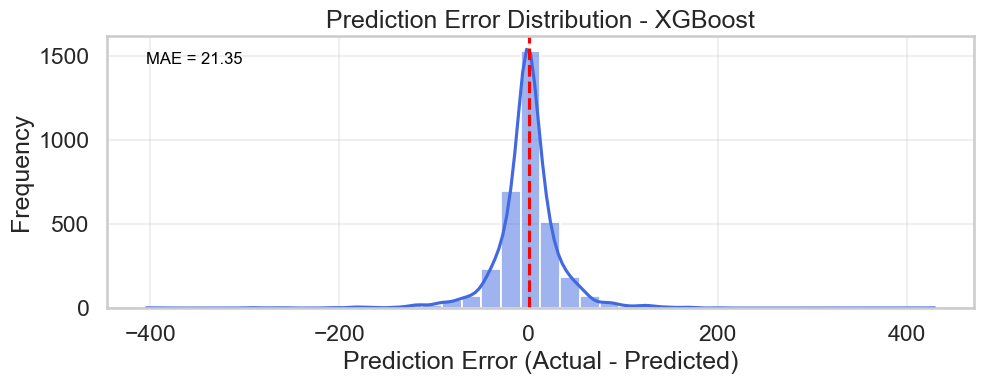

In [ ]:
# ===============================
# RideWise: Model Visualization & Evaluation
# ===============================

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# ===============================
# Select Model to Visualize
# ===============================
best_model_name = "XGBoost"   # 👈 change to "Gradient Boosting" or "Random Forest"
print(f"\n🏆 Selected Model for Visualization: {best_model_name}")

# --- Create pipeline ---
best_model = models[best_model_name]
best_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # ensure preprocessor is already defined
    ('model', best_model)
])

# Fit pipeline on full training data
best_pipeline.fit(X_train, y_train)
y_pred_best = best_pipeline.predict(X_test)

# ===============================
# Compute Metrics (compatible with all sklearn versions)
# ===============================
r2 = r2_score(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))  # works in any version
mae = mean_absolute_error(y_test, y_pred_best)

print(f"\n📊 Performance Metrics ({best_model_name}):")
print(f"   R² Score : {r2:.4f}")
print(f"   RMSE     : {rmse:.2f}")
print(f"   MAE      : {mae:.2f}")

# ===============================
# 1️⃣ Actual vs Predicted Line Plot
# ===============================
subset = 200  # show only first 200 samples
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:subset], label="Actual", color="green", linewidth=2)
plt.plot(y_pred_best[:subset], label="Predicted", color="orange", linestyle="--")
plt.title(f"Actual vs Predicted (First {subset} Samples) - {best_model_name}")
plt.xlabel("Sample Index")
plt.ylabel("Bike Demand Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# 2️⃣ Scatter Plot: Actual vs Predicted
# ===============================
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title(f"Actual vs Predicted Scatter - {best_model_name}")
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================
# 3️⃣ Error Distribution
# ===============================
errors = y_test - y_pred_best
plt.figure(figsize=(10,4))
sns.histplot(errors, bins=40, kde=True, color="royalblue")
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Prediction Error Distribution - {best_model_name}")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.text(errors.min(), plt.ylim()[1]*0.9, f"MAE = {mae:.2f}", color='black', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


⏳ Starting XGBoost Random Search tuning...
Fitting 3 folds for each of 30 candidates, totalling 90 fits
✅ XGBoost Random Search tuning completed!

🏆 Tuned XGBoost Performance:
Best Parameters: {'model__colsample_bytree': np.float64(0.7049763486783568), 'model__gamma': np.float64(0.2560465291496405), 'model__learning_rate': np.float64(0.05529915503958759), 'model__max_depth': 9, 'model__min_child_weight': 4, 'model__n_estimators': 227, 'model__subsample': np.float64(0.855325405158244)}
R² Score: 0.9601
RMSE: 35.53
MAE: 21.46


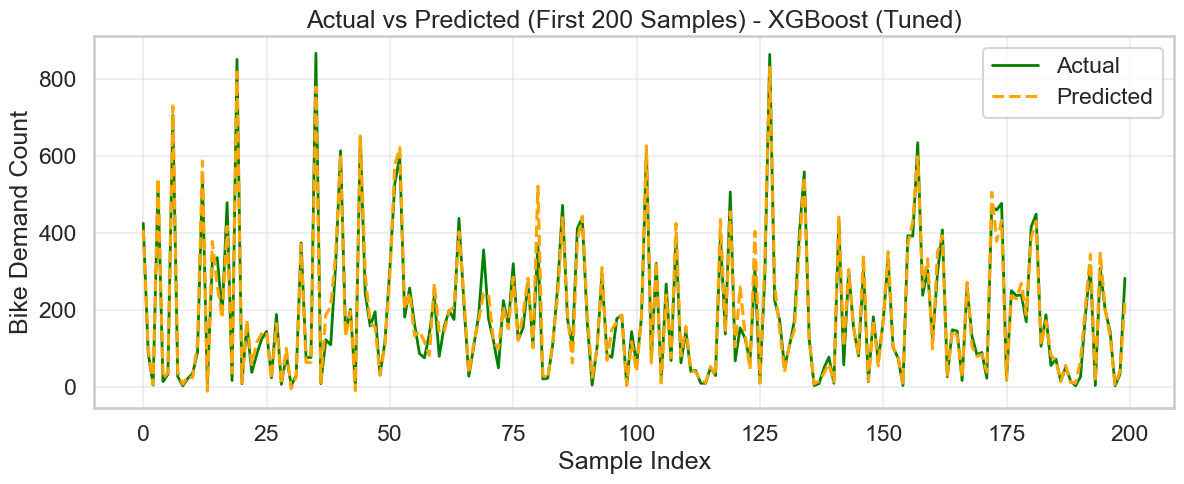

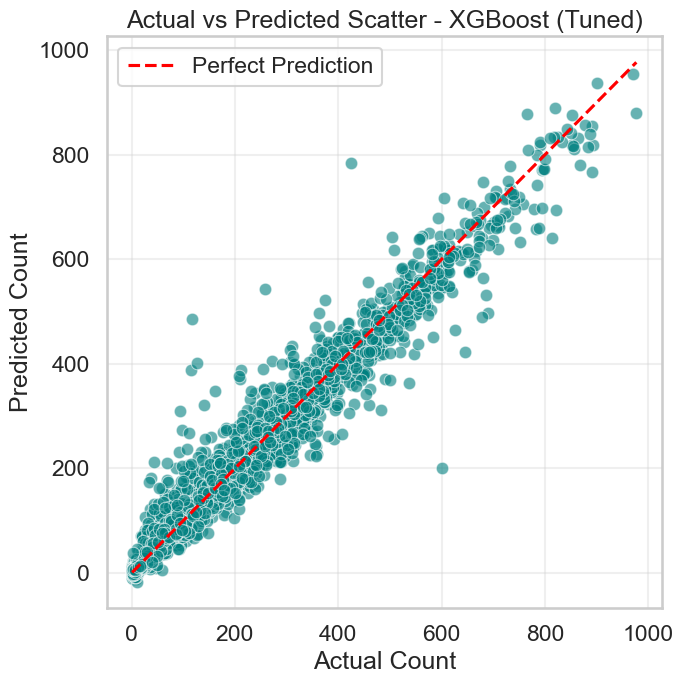

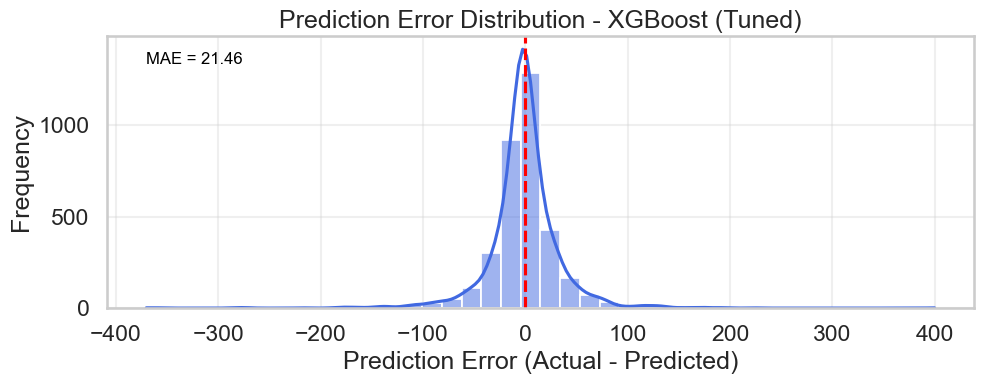

In [ ]:
# ===============================
# RideWise: Tuned XGBoost Training, Evaluation & Saving
# ===============================

from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# ===============================
# 1️⃣ Setup XGBoost & Pipeline
# ===============================
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

pipe_xgb = Pipeline([
    ('preprocessor', preprocessor),  # ensure preprocessor is defined
    ('model', xgb_model)
])

param_dist_xgb = {
    'model__n_estimators': randint(100, 400),
    'model__max_depth': randint(3, 10),
    'model__learning_rate': uniform(0.01, 0.2),
    'model__subsample': uniform(0.7, 0.3),
    'model__colsample_bytree': uniform(0.7, 0.3),
    'model__gamma': uniform(0, 0.5),
    'model__min_child_weight': randint(1, 6)
}

random_search_xgb = RandomizedSearchCV(
    estimator=pipe_xgb,
    param_distributions=param_dist_xgb,
    n_iter=30,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# ===============================
# 2️⃣ Fit RandomizedSearchCV
# ===============================
print("⏳ Starting XGBoost Random Search tuning...")
random_search_xgb.fit(X_train, y_train)
print("✅ XGBoost Random Search tuning completed!")

best_xgb_pipeline = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb_pipeline.predict(X_test)

# ===============================
# 3️⃣ Evaluation Metrics
# ===============================
r2_best_xgb = r2_score(y_test, y_pred_xgb)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # works on all sklearn versions
mae_best_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"\n🏆 Tuned XGBoost Performance:")
print(f"Best Parameters: {random_search_xgb.best_params_}")
print(f"R² Score: {r2_best_xgb:.4f}")
print(f"RMSE: {rmse_best_xgb:.2f}")
print(f"MAE: {mae_best_xgb:.2f}")

# ==============================

# ===============================
# 5️⃣ Visualization
# ===============================
best_model_name = "XGBoost (Tuned)"
subset = 200

# --- Line Plot: Actual vs Predicted ---
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:subset], label="Actual", color="green", linewidth=2)
plt.plot(y_pred_xgb[:subset], label="Predicted", color="orange", linestyle="--")
plt.title(f"Actual vs Predicted (First {subset} Samples) - {best_model_name}")
plt.xlabel("Sample Index")
plt.ylabel("Bike Demand Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Scatter Plot ---
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title(f"Actual vs Predicted Scatter - {best_model_name}")
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Error Distribution ---
errors = y_test - y_pred_xgb
plt.figure(figsize=(10,4))
sns.histplot(errors, bins=40, kde=True, color="royalblue")
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Prediction Error Distribution - {best_model_name}")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.text(errors.min(), plt.ylim()[1]*0.9, f"MAE = {mae_best_xgb:.2f}", color='black', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


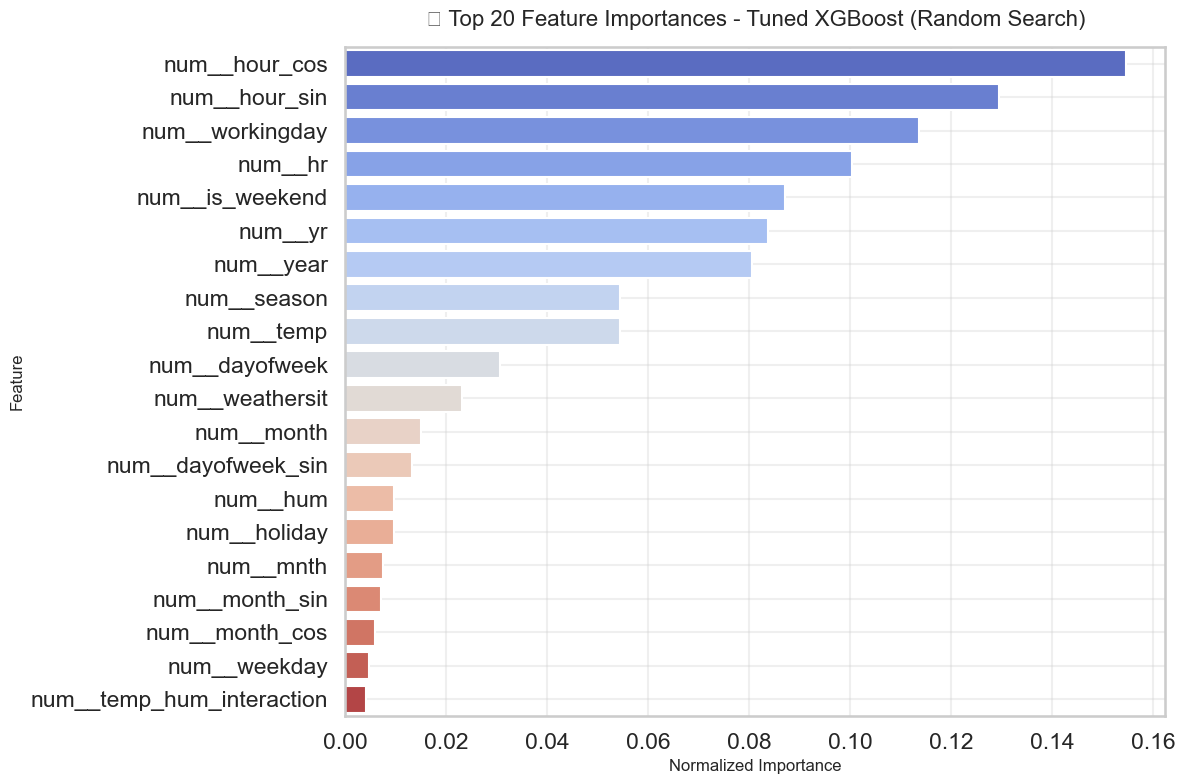


🏆 Top 10 Important Features:
            Feature  Importance
17    num__hour_cos    0.154591
16    num__hour_sin    0.129451
6   num__workingday    0.113512
3           num__hr    0.100402
15  num__is_weekend    0.087151
1           num__yr    0.083644
11        num__year    0.080479
0       num__season    0.054406
8         num__temp    0.054287
14   num__dayofweek    0.030676


In [ ]:
# ===============================
# 🔍 Feature Importance - Tuned XGBoost (RandomizedSearchCV)
# ===============================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Extract fitted XGBoost model ---
xgb_fitted = best_xgb_pipeline.named_steps['model']

# --- Extract feature names from the preprocessor ---
feature_names = best_xgb_pipeline.named_steps['preprocessor'].get_feature_names_out()

# --- Create DataFrame for feature importances ---
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': xgb_fitted.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- Normalize importance values (for better interpretability) ---
feature_importance_df['Importance'] /= feature_importance_df['Importance'].sum()

# --- Plot Top 20 Most Important Features ---
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importance_df.head(20), 
    palette='coolwarm'
)
plt.title("🔍 Top 20 Feature Importances - Tuned XGBoost (Random Search)", fontsize=16, pad=15)
plt.xlabel("Normalized Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Print Top 10 Features in Console ---
print("\n🏆 Top 10 Important Features:")
print(feature_importance_df.head(10))


In [ ]:
import joblib

# Save the best XGBoost pipeline (with preprocessing)
joblib.dump(best_xgb_pipeline, "ridewise_xgboost_model.pkl")

print("✅ Model saved successfully as 'ridewise_xgboost_model.pkl'")


✅ Model saved successfully as 'ridewise_xgboost_model.pkl'


In [ ]:
# Load the saved model
loaded_model = joblib.load("ridewise_xgboost_model.pkl")

# Example: Make prediction
sample_pred = loaded_model.predict(X_test[:5])
print("Sample predictions:", sample_pred)


Sample predictions: [408.22656    96.50768     5.6919055 542.35657    21.659851 ]
